In [1]:
import pandas as pd

TSLA = '/kaggle/input/tesla-stock-price/Tasla_Stock_Updated_V2.csv'
df = pd.read_csv(filepath_or_buffer=TSLA, index_col=['Unnamed: 0'], parse_dates=['Date'])
df['year'] = df['Date'].dt.year
df['dollars'] = 0.5 * (df['Low'] + df['High']) * df['Volume']
df.head()

,Date,Open,High,Low,Close,Volume,year,dollars
0,2015-01-02,14.858000,14.883333,14.217333,14.620667,71466000,2015,1.039854e+09
1,2015-01-05,14.303333,14.433333,13.810667,14.006000,80527500,2015,1.137209e+09
2,2015-01-06,14.004000,14.280000,13.614000,14.085333,93928500,2015,1.310021e+09
3,2015-01-07,14.223333,14.318667,13.985333,14.063333,44526000,2015,6.301320e+08
4,2015-01-08,14.187333,14.253333,14.000667,14.041333,51637500,2015,7.294830e+08


Let's look at the price correlations; we expect them to be near 1.0 but not exactly 1.0.

In [2]:
df[['Open', 'High', 'Low', 'Close']].corr()

,Open,High,Low,Close
Open,1.000000,0.999661,0.999530,0.999027
High,0.999661,1.000000,0.999537,0.999563
Low,0.999530,0.999537,1.000000,0.999608
Close,0.999027,0.999563,0.999608,1.000000


<Axes: xlabel='Date', ylabel='Close'>

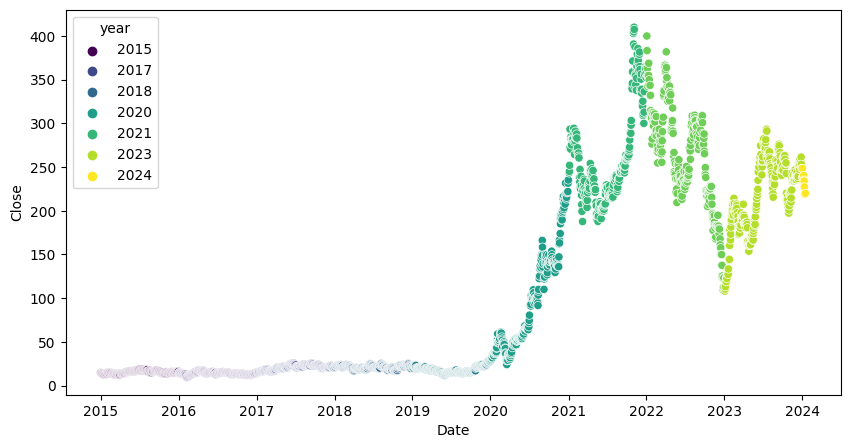

In [3]:
import matplotlib.pyplot as plt
from seaborn import scatterplot

plt.figure(figsize=(10, 5))
scatterplot(data=df, x='Date', y='Close', hue='year', palette='viridis')

We can see that there was an early price regime, where the prices were relatively low, and a later regime, where prices vary quite a lot. Let's look at a log plot to see if there's more volatility in the early regime than we can see above.

<Axes: xlabel='Date', ylabel='Close'>

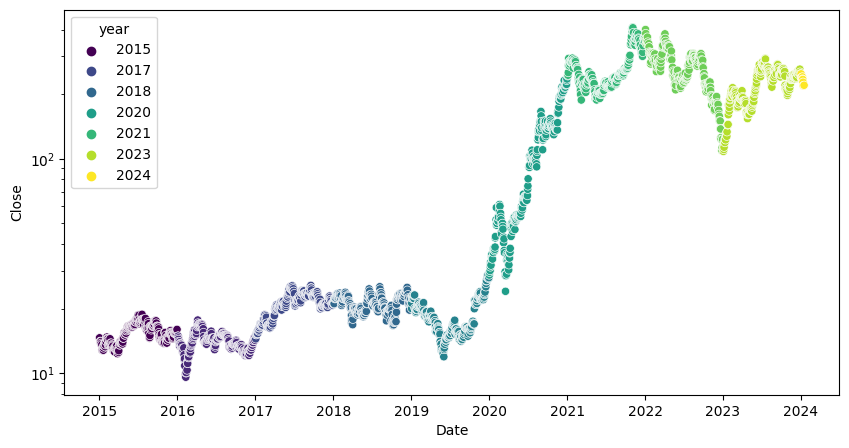

In [4]:
plt.figure(figsize=(10, 5))
plt.yscale(value='log')
scatterplot(data=df, x='Date', y='Close', hue='year', palette='viridis')

A log plot of the price shows there is, relatively speaking, a moderate amount of volatility in both the early regime and the later regime, with a big run-up from mid-2019 through early 2021. Let's look at the volume as a function of the price.

<Axes: xlabel='Volume', ylabel='Close'>

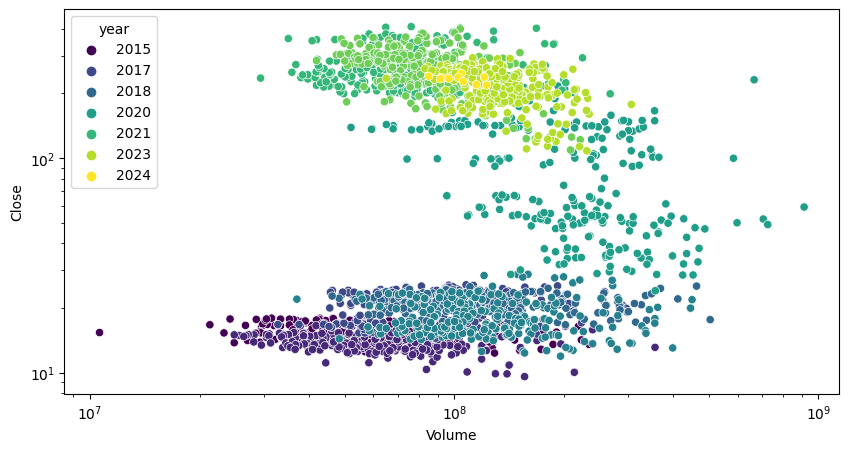

In [5]:
plt.figure(figsize=(10, 5))
plt.xscale(value='log')
plt.yscale(value='log')
scatterplot(data=df, x='Volume', y='Close', hue='year', palette='viridis')

Well no, the price does not seem to be a function of the volume. How about the other way around?

<Axes: xlabel='Close', ylabel='Volume'>

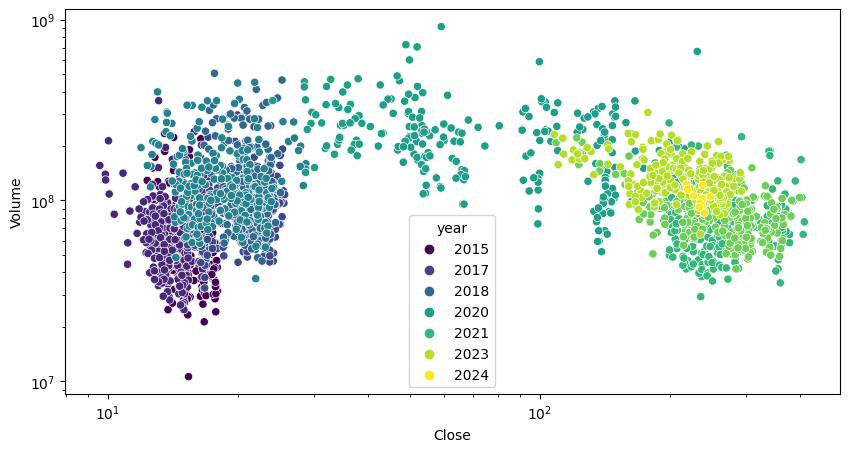

In [6]:
plt.figure(figsize=(10, 5))
plt.xscale(value='log')
plt.yscale(value='log')
scatterplot(data=df, y='Volume', x='Close', hue='year', palette='viridis')

While we do see the 2020 price run-up pretty clearly, we tend to see that volume seems oddly stable in spite of the price level.

We added a synthetic quantity in the first cell above, adding an approximation to the volume in dollars each day. Let's take a look at that as a time series.

<Axes: xlabel='Date', ylabel='dollars'>

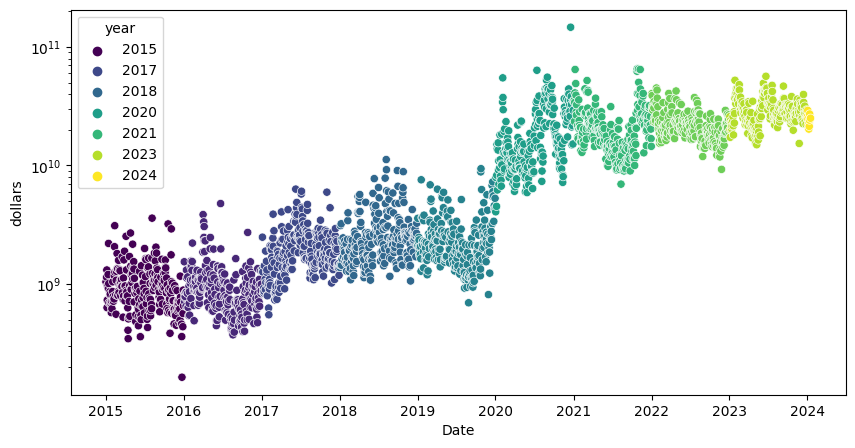

In [7]:
plt.figure(figsize=(10, 5))
plt.yscale(value='log')
scatterplot(data=df, x='Date', y='dollars', hue='year', palette='viridis')

What do we see? We see that in both regimes the dollar value gradually trends up over time, with a sharp upward break during the 2020 price run-up.